# Régression prédictif & overfitting 
Une régression a pour objectif d’expliquer une variable Y par une autre variable X. Par exemple on peut expliquer les performances d’un athlète par la durée de son entrainement ou même le salaire d’une personne par le nombre d’années passées.

## Importation des librairies

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Données utilisées
Dans cette partie le jeu de données que nous allons utiliser est le suivant : Boston Housing Dataset.
Ce jeu de données comprend le prix des maisons dans les différentes zones de Boston. L’objectif sera de prédire le prix des maisons (variable expliquée) grâce aux différentes informations présentes dans le jeu de données (variables explicatives).

In [2]:
from sklearn.datasets import load_boston
donnees_boston = load_boston()

Ce jeux de données est un dictionnaire avec les éléments suivants : 

In [3]:
donnees_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Le dictionnaire contient :
- data : les informations sur les différentes maisons à boston
- target : le prix des maisons
- feature_names : les noms des différentes caractéristiques du jeu de données
- DESCR : la description du jeu de données

In [4]:
#On affiche la description du jeu de données
donnees_boston.DESCR.split("\n")

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

MEDV est notre variable à expliquer et les autres sont des variables explicatives.

## Préparation des données

Das cette partie, votre client vous demande de transformer notre jeu de données en un data frame et on vérifie qu’il n’y pas de valeurs nulles.

In [5]:
data = pd.DataFrame(donnees_boston.data, columns=donnees_boston.feature_names)
data['MEDV'] = pd.Series(donnees_boston.target)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# Vérification du type de données et des valeurs nulles pour chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Selection de variables 
Avant de créer notre modèle on se rend compte qu’on a 13 variables explicatives pour le prix. Ainsi si on veut être malin on se pose les questions suivantes : dois-je choisir toutes ces variables pour mon modèle ? Quelles sont les variables qui ont une forte relation linéaire avec la variable ‘prix’. Pour répondre à ces interrogations tester les approches suivantes :

Avec une matrcice de correlation, quelles sont les variables les plus pertinentes pour notre analyse ?
Les coefficients de corrélation se situent dans l’intervalle [-1,1].
- si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
- si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
- si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation.

<AxesSubplot:>

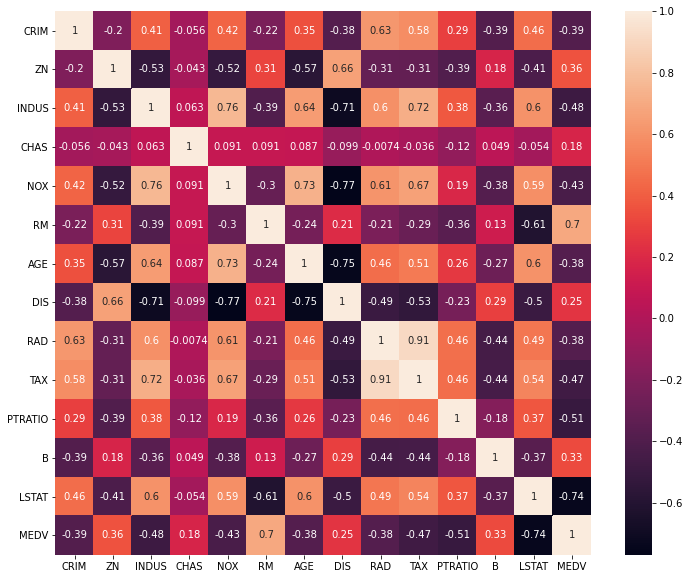

In [9]:
data_corr = data.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(data_corr, annot=True)

## Entrainement du modèle

Dans cette partie on vous demande : 
- Tester plusieurs modèle d'entrainement 
- Evaluer vos modèles et justifier vos choix

In [10]:
X = data.iloc[:, 0:13].values
y = data.iloc[:, 13].values.reshape(-1,1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [11]:
# REGRESSION LINEAIRE
from sklearn.linear_model import LinearRegression

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [12]:
regressor_linear.score(X, y)

0.7351694054486109

In [13]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Cross Validation
cv_linear = cross_val_score(estimator=regressor_linear, X=X_train, y=y_train, cv=10)

# R2 Train set
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# R2 Test set
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print('CV : ', cv_linear.mean())
print('R2 (train) : ', r2_score_linear_train)
print('R2 (test) : ', r2_score_linear_test)
print('RMSE : ', rmse_linear)

CV :  0.6924461175868142
R2 (train) :  0.750158126946193
R2 (test) :  0.6571037340628161
RMSE :  4.836047065185212


In [14]:
# REGRESSION POLYNOMIALE
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [15]:
cv_poly2 = cross_val_score(estimator=regressor_poly2, X=X_train, y=y_train, cv=10)

y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV : ', cv_poly2.mean())
print('R2 (train) : ', r2_score_poly2_train)
print('R2 (test) : ', r2_score_poly2_test)
print('RMSE: ', rmse_poly2)

CV :  0.6924461175868142
R2 (train) :  0.9272964680405469
R2 (test) :  0.8289377795378726
RMSE:  3.41575091604562


In [16]:
# SVR

# Standardisation
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [17]:
from sklearn.svm import SVR

regressor_svr = SVR(kernel='rbf')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [18]:
cv_svr = cross_val_score(estimator=regressor_svr, X=X_scaled, y=y_scaled.ravel(), cv=10)

y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV : ', cv_svr.mean())
print('R2 (train) : ', r2_score_svr_train)
print('R2 (test) : ', r2_score_svr_test)
print('RMSE : ', rmse_svr)

CV :  0.797800561947324
R2 (train) :  0.8838283432832126
R2 (test) :  0.7274346477679263
RMSE :  4.311659587522012


In [19]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor(random_state=0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [20]:
cv_dt = cross_val_score(estimator=regressor_dt, X=X_train, y=y_train, cv=10)

y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV : ', cv_dt.mean())
print('R2 (train) : ', r2_score_dt_train)
print('R2 (test) : ', r2_score_dt_test)
print('RMSE : ', rmse_dt)

CV :  0.6623499763249997
R2 (train) :  1.0
R2 (test) :  0.6398245679799077
RMSE :  4.956398122925678


In [21]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators=500, random_state=0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [22]:
cv_rf = cross_val_score(estimator=regressor_rf, X=X_scaled, y=y_train.ravel(), cv=10)

y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV : ', cv_rf.mean())
print('R2 (train): ', r2_score_rf_train)
print('R2 (test): ', r2_score_rf_test)
print('RMSE : ', rmse_rf)

CV :  0.8114694076961495
R2 (train):  0.9780156985816304
R2 (test):  0.8038728376816393
RMSE :  3.6574467628039473


In [23]:
models = [
    ('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
    ('Polynomial Regression (2nd degré)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
    ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
    ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
    ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
]

In [24]:
predict = pd.DataFrame(data=models, columns=['Model', 'RMSE', 'R2 (train)', 'R2 (test)', 'CV'])
predict

,Model,RMSE,R2 (train),R2 (test),CV
0,Linear Regression,4.836047,0.750158,0.657104,0.692446
1,Polynomial Regression (2nd degré),3.415751,0.927296,0.828938,0.692446
2,Support Vector Regression,4.311660,0.883828,0.727435,0.797801
3,Decision Tree Regression,4.956398,1.000000,0.639825,0.662350
4,Random Forest Regression,3.657447,0.978016,0.803873,0.811469
